In [1]:
# Imports
!pip install sympy --quiet
from scipy.integrate import solve_bvp
import numpy as np
import scipy.optimize as opt       # import root-finding algorithm
import sympy as sp                 # Python toolbox for symbolic maths
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # Toolbox for rendring 3D figures
from mpl_toolkits import mplot3d   # Toolbox for rendring 3D figures
# @title Figure Settings
import ipywidgets as widgets  # interactive display
from ipywidgets import interact
from pathlib import Path
import math
%config InlineBackend.figure_format = 'retina'
# use NMA plot style
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/master/nma.mplstyle")
my_layout = widgets.Layout()

fig_w, fig_h = 12, 4.5
my_fontsize = 16
my_params = {'axes.labelsize': my_fontsize,
          'axes.titlesize': my_fontsize,
          'figure.figsize': [fig_w, fig_h],
          'font.size': my_fontsize,
          'legend.fontsize': my_fontsize-4,
          'lines.markersize': 8.,
          'lines.linewidth': 2.,
          'xtick.labelsize': my_fontsize-2,
          'ytick.labelsize': my_fontsize-2}

plt.rcParams.update(my_params)

In [2]:
CB91_Blue = '#2CBDFE'
CB91_Green = '#47DBCD'
CB91_Pink = '#F3A0F2'
CB91_Purple = '#9D2EC5'
CB91_Violet = '#661D98'
CB91_Amber = '#F5B14C'
color_list = [CB91_Blue, CB91_Pink, CB91_Green, CB91_Amber, CB91_Purple, CB91_Violet]

In [ ]:
def GetNormDist(x,x0,mu,sigma):
    y = mu*np.exp(-(x-x0)**2/sigma)
    return y

In [ ]:
# mu, sigma = 0, 0.1

mu = 1
variance = 1
sigma = math.sqrt(variance)
positions  = np.linspace(3,221,10)
x = np.linspace(0,221,int(221/0.114))
y = np.sum(GetNormDist(x,i,mu,sigma) for i in positions)
print(y)
# for i in positions:
#     plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.plot(x, y)
plt.show()

# fig, axes = plt.subplots(1, 1,figsize=(10, 8))
# # ax = axes.ravel()
# #     plt.rc('font', **{'family':'serif','serif':['Palatino']})
# plt.rc('text', usetex=False)
# axes.plot(s)
# # ax[0].set_xlabel(xlab,fontsize=fsize)
# ax[0].set_ylabel(ylab,fontsize=fsize)
# plt.title(title_string,fontsize=fsize)
# plt.show()

In [4]:
def PlotTanh(r=1):
    x = np.arange(0,221,0.0114)
    y = np.tanh(r*x)
    plt.plot(x, y)
    plt.show()

In [5]:
_ = widgets.interact(PlotTanh,r = (0,1,0.1))

interactive(children=(FloatSlider(value=1.0, description='r', max=1.0), Output()), _dom_classes=('widget-inter…

In [6]:
def PlotSingleSimSingleProtein(x,y1,y2,lab1,lab2,xlab,ylab,title_string,file_name,width=10,height=8,fsize=16,save_it = 1):
    print(width,height)
    fig, axes = plt.subplots(1, 2,figsize=(width, height))
    ax = axes.ravel()
    fig.suptitle(title_string,fontsize=fsize)
#     plt.rc('font', **{'family':'serif','serif':['Palatino']})
    plt.rc('text', usetex=False)
    ax[0].plot(x,y1,label=lab1)
    ax[0].set_xlabel(xlab,fontsize=fsize)
    ax[0].set_ylabel(ylab,fontsize=fsize)
#     plt.title(title_string,fontsize=fsize)
    ax[1].plot(x,y2,label=lab2)
    ax[1].set_xlabel(xlab,fontsize=fsize)
    ax[1].set_ylabel(ylab,fontsize=fsize)
    
    plt.legend(prop={'size': fsize})
    # plt.show()
    folder = "."
    if save_it == 1:
        plt.savefig("%s/%s.%s"%(folder,file_name,"png"),dpi=150)
        plt.savefig("%s/%s.%s"%(folder,file_name,"eps"),dpi=150)
        print("saved figures to: {%s/%s}" %(folder, file_name))
    else:
        print("Plots not saved")
    plt.show()
    

In [7]:
def PlotSingleSimTwoProtein(x,ps,pc,p_spine,lab_ps,lab_pc,lab_p_spine,xlab,ylab,title_string,file_name,width=10,height=8,fsize=16,save_it = 1):
    fig, axes = plt.subplots(1, 2,figsize=(width, height))
    ax = axes.ravel()
#     plt.rc('font', **{'family':'serif','serif':['Palatino']})
#     plt.rc('text', usetex=True)
    fig.suptitle(title_string,fontsize=fsize)
    ax[0].plot(x,ps,label=lab_ps,color=color_list[0])
    ax[0].plot(x,pc,label=lab_pc,color=color_list[1])
    ax[0].set_xlabel(xlab,fontsize=fsize)
    ax[0].set_ylabel(ylab,fontsize=fsize)
#     plt.title(title_string,fontsize=fsize)
    ax[0].legend(prop={'size': fsize})
#     ax[0].ylim(0,3)
#     plt.ylim(0,1.1)
    ax[1].plot(x,p_spine,label=lab_p_spine,color=color_list[2])
    ax[1].set_xlabel(xlab,fontsize=fsize)
    ax[1].set_ylabel('Filling fraction',fontsize=fsize)
    
#     plt.title(title_string,fontsize=fsize)
    ax[1].legend(prop={'size': fsize})
#     plt.ylim(0,2)
    # plt.show()
    folder = "."
    if save_it == 1:
        plt.savefig("%s/%s.%s"%(folder,file_name,"png"),dpi=150)
        plt.savefig("%s/%s.%s"%(folder,file_name,"eps"),dpi=150)
        print("saved figures to: {%s/%s}" %(folder, file_name))
    else:
        print("Plots not saved")
    plt.show()
    

In [8]:
def CreateFolderRecursive(folder):
        Path(folder).mkdir(parents=True, exist_ok=True)

In [9]:
L= 500

In [10]:
class DendriteWithStochasticSpinesConstantV():
    def __init__(self,D_s,D_c,V_p,half_life_surf,half_life_int,alpha,beta,Jsin,Jcin,eta_s_max,eta_s_zero,gamma):
        self.D_s = D_s   # in uM^2/s
        self.D_c = D_c   # in uM^2/s
        self.V_p = V_p    # in uM/s
        self.half_life_surf = half_life_surf # in days
        self.Lamda_ps = np.log(2)/(self.half_life_surf*24*60*60);
        self.half_life_int = half_life_int # in days
        self.Lamda_pc = np.log(2)/(self.half_life_int*24*60*60);
        self.alpha = alpha;
        self.beta = beta;
        self.Jsin = Jsin;
        self.Jcin = Jcin;
        self.eta_s_max = eta_s_max;
        self.eta_s_zero = eta_s_zero;
        self.gamma = gamma;
        
    def updateModelParams(self,D_s = None,D_c = None,V_p = None,half_life_surf = None,half_life_int = None\
                          ,alpha = None,beta = None,Jsin = None,Jcin = None,eta_s_max=None,eta_s_zero = None,gamma=None):
        if D_s:
            self.D_s = D_s   # in uM^2/s
        if D_c:
            self.D_c = D_c   # in uM^2/s
        if V_p:
            self.V_p = V_p    # in uM/s
        if half_life_surf:
            self.half_life_surf = half_life_surf # in days
            self.Lamda_ps = np.log(2)/(self.half_life_surf*24*60*60);
        if half_life_int:
            self.half_life_int = half_life_int # in days
            self.Lamda_pc = np.log(2)/(self.half_life_int*24*60*60);
        if alpha:
            self.alpha = alpha;
        if beta:
            self.beta = beta;
        if Jsin:
            self.Jsin = Jsin;
        if Jcin:
            self.Jcin = Jcin;
        if eta_s_max:
            self.eta_s_max = eta_s_max;
#         if eta_c_max:
#             self.eta_c_max = eta_c_max;
        if eta_s_zero:
            self.eta_s_zero = eta_s_zero;
        if gamma:
            self.gamma = gamma;
    
    def fun(self,x,y):
        ps,dps,pc,dpc = y
        return [dps,\
                ((self.alpha+self.Lamda_ps)/self.D_s)*ps  - (self.beta/self.D_s)*pc, dpc,\
                ((self.beta+self.Lamda_pc)/self.D_c)*pc + (self.V_p/self.D_c)*dpc - (self.alpha/self.D_c)*ps\
               ]
                             
        
    def bc(self,ya,yb):
        return np.array([self.D_s*ya[1] + self.Jsin, self.D_s*yb[1], self.D_c*ya[3] - self.V_p*ya[2] + self.Jcin, self.D_c*yb[3]- self.V_p*yb[2]])

    def solveModel(self):
        delta_x = 0.0114; #step size for the numerical simulation
        # sim_id="001";
        # print(len(x_line))
        # solving model
        # D_p * p'' - (V_p(x)*p)' - Lamda_p*p = 0
        x=np.arange(0,L,delta_x)
#         print(x)
        params=np.array([L]);
        y = np.zeros((4,x.size))
        soln = solve_bvp(self.fun, self.bc, x, y,max_nodes=1e+9,verbose=2)
#         print(len(soln))
        ps_dist = soln.sol(x)[0]
        pc_dist = soln.sol(x)[2]
#         ps_spine = soln.sol(x)[4]
#         self.IntegralBC(delta_x,ps_dist,pc_dist)
        return x, ps_dist, pc_dist
    
#     def IntegralBC(self,delta_x,ps_dist,pc_dist):
#         protein_loss = -self.Jcin + (self.Lamda_pc*np.sum(pc_dist) + np.sum(self.eta_s_max*np.tanh(self.eta_s_zero*ps_dist)))*delta_x
#         print("protein lost/found  in the void = ",protein_loss)
        
    def GetODERoots(self):
        A =  [[0, 0, 1, 0],
              [0, 0, 0, 1],
              [(self.alpha+self.Lamda_ps)/self.D_s, -self.beta/self.D_s, 0, 0],
              [-self.alpha/self.D_c, (self.beta+self.Lamda_pc)/self.D_c, 0, self.V_p/self.D_c]];
        ss_eigen_values,ss_eig_vec = np.linalg.eig(A);
#         print(A)
#         print(ss_eigen_values)
        return ss_eigen_values,ss_eig_vec
    def Descriminant(self):
        a = 1;
        b = -self.V_p/self.D_c;
        c = -((self.beta+self.Lamda_pc)/self.D_c + (self.alpha+self.Lamda_ps)/self.D_s);
        d = self.V_p*(self.alpha+self.Lamda_ps)/(self.D_c*self.D_s);
        e = (self.Lamda_ps*self.beta + self.alpha*self.Lamda_pc + self.Lamda_pc*self.Lamda_ps)/(self.D_s*self.D_c);
        
        des = 256*(a**3)*(e**3) - 192*(a**2)*(b*d)*(e**2) - 128*(a*c*e)**2 + 144*(a*d)**2*(c*e) - 27*(a**2)*(d**4) \
        + 144*a*c*(b*e)**2 - 6*a*e*(b*d)**2 - 80*a*b*d*e*(c**2) + 18*a*b*c*(d**3) + 16*a*e*(c**4) - 4*a*(c**3)*(d**2) \
        -27*(b**4)*(e**2) + 18*c*d*e*(b**3) - 4*(b*d)**3 - 4*e*(b**2)*(c**3) + (b*c*d)**2
        
        print(des)
        return des
    def GetODEPrefectors(self,roots):
        r1,r2,r3,r4 = roots
        A = np.array([[self.D_s*r1**2 - self.Lamda_ps, 0, 0, 0, self.D_c*r1**2 - self.V_p*r1 - self.Lamda_pc, 0, 0, 0],
             [0,self.D_s*r2**2 - self.Lamda_ps, 0, 0, 0, self.D_c*r2**2 - self.V_p*r2 - self.Lamda_pc, 0, 0, ],
             [0, 0, self.D_s*r3**2 - self.Lamda_ps, 0, 0, 0, self.D_c*r3**2 - self.V_p*r3 - self.Lamda_pc, 0 ],
             [0, 0, 0, self.D_s*r4**2 - self.Lamda_ps, 0, 0, 0, self.D_c*r4**2 - self.V_p*r4 - self.Lamda_pc],
             [r1*np.exp(r1*L), r2*np.exp(r2*L), r3*np.exp(r3*L), r4*np.exp(r4*L), 0, 0, 0, 0],
             [r1, r2, r3, r4, 0, 0, 0, 0],
             [0, 0, 0, 0,(self.D_c*r1 - self.V_p)*np.exp(r1*L), (self.D_c*r2 - self.V_p)*np.exp(r2*L), (self.D_c*r3 - self.V_p)*np.exp(r3*L), (self.D_c*r4 - self.V_p)*np.exp(r4*L) ],
             [0, 0, 0, 0,self.D_c*r1 - self.V_p, self.D_c*r2 - self.V_p, self.D_c*r3 - self.V_p, self.D_c*r4 - self.V_p ]]);
        B = np.array([0, 0, 0, 0, 0, 0, 0, -self.Jcin]);
        prefactors = np.linalg.solve(A,B)
#         print(prefactors)
        return prefactors
    def SolveAnalytical(self):
        desc = self.Descriminant()
        roots,vecs = self.GetODERoots()
        pfs = self.GetODEPrefectors(roots)
        delta_x = 0.0114;
        x=np.arange(0,L,delta_x)
        ps_dist = np.zeros((np.shape(x)))
        pc_dist = np.zeros((np.shape(x)))
        for i in range(0,4):
            print(i)
            ps_dist += pfs[i]*np.exp(roots[i]*x)
            pc_dist += pfs[4+i]*np.exp(roots[i]*x)
#         print("*****\n",ps_dist,pc_dist)
        self.IntegralBC(ps_dist,pc_dist,delta_x)
        return x,ps_dist,pc_dist
    
    def IntegralBC(self,ps_dist,pc_dist,delta_x):
        tot_ps_num = np.sum(ps_dist)*delta_x
        tot_pc_num = np.sum(pc_dist)*delta_x
        tot_ps_ana = (self.beta*self.Jcin)/(self.Lamda_pc*self.alpha)
        tot_pc_ana = self.Jcin/self.Lamda_pc
        print("total_p = ",tot_ps_ana+tot_pc_ana,tot_ps_num+tot_pc_num)
        print("ratio cytoplasm = ",tot_pc_ana/tot_pc_num)
        print("ratio surf = ",tot_ps_ana/tot_ps_num)

 v_p =0.00000 	|| Jin = 0.02 	|| alpha =0.01 	|| beta =0.01 	|| eta_s0 = 1.00e-02 
6.33864950134128e-10
0
1
2
3
total_p =  17526.716805870197 17526.932650911847
ratio cytoplasm =  0.9999875407028651
ratio surf =  0.9999878724726883
[20.06134391 20.06134327 20.06134136 20.06133818 20.06133373 20.06132803
 20.06132107 20.06131286 20.0613034  20.0612927  20.06128077 20.0612676
 20.0612532  20.06123758 20.06122074 20.06120269 20.06118342 20.06116295
 20.06114127 20.0611184 ] 
 [26.65508774 26.65300786 26.65093378 26.64886548 26.64680292 26.6447461
 26.64269499 26.64064958 26.63860983 26.63657574 26.63454728 26.63252442
 26.63050716 26.62849547 26.62648934 26.62448873 26.62249363 26.62050403
 26.61851989 26.61654121] 
 [53.76712604 53.76712586 53.76712533 53.76712445 53.76712321 53.76712162
 53.76711968 53.7671174  53.76711476 53.76711179 53.76710846 53.7671048
 53.76710079 53.76709644 53.76709175 53.76708672 53.76708136 53.76707566
 53.76706963 53.76706326]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


saved figures to: {./Figures/TwoProtein/WithCappedUptake/002/Spine_SingleSim_TwoProtein_capped_uptake_dist_constantV_002_v_0.000000e+00}


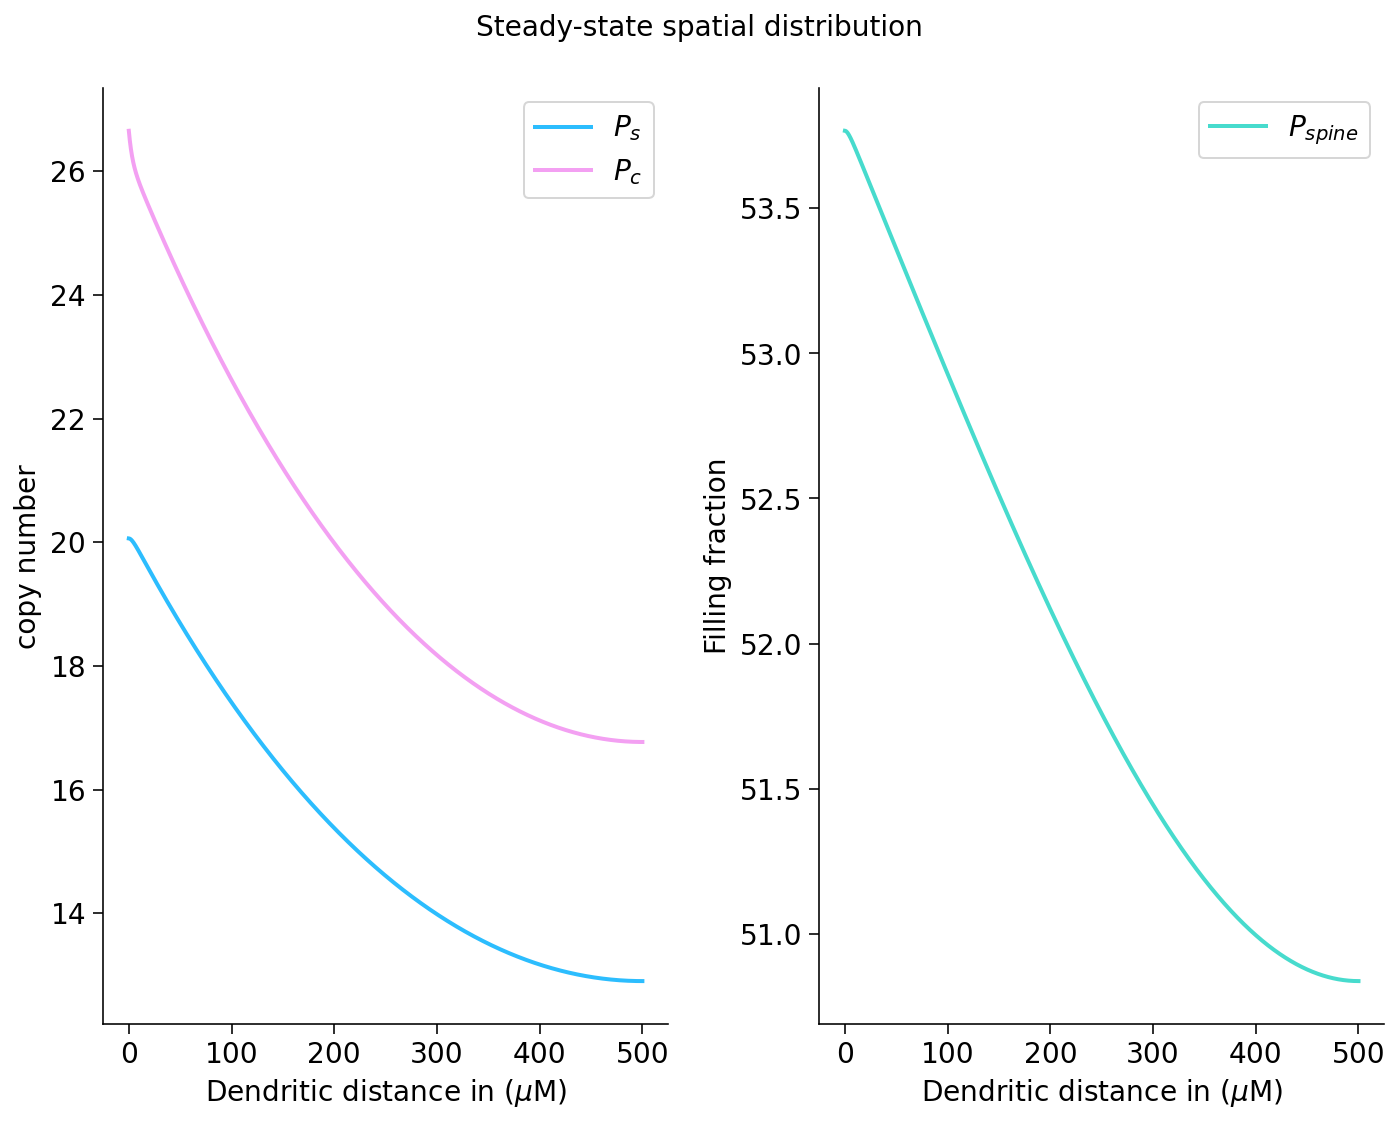

Soma Normalized


In [14]:
def RunSim5(v_p=0,Jcin=0.0021,alpha=0.01,beta = 0.02,eta_s0=.001,gamma=1/43):
    print("=========================================================================================")
    print(" v_p =%.5f \t|| Jin = %0.2f \t|| alpha =%0.2f \t|| beta =%0.2f \t|| eta_s0 = %.2e \n"%(v_p,Jcin,alpha,beta,eta_s0),end="")
    print("=========================================================================================")
    SP_model1 = DendriteWithStochasticSpinesConstantV(0.45,0.1,v_p,float('inf'),4.35,alpha,beta,0.0,Jcin*0.87,60,eta_s0,gamma);
    sim_id = "002";
    x,ps_dist,pc_dist = SP_model1.SolveAnalytical()
#     title_string = (r"Steady-state spatial distribution"+" \n parameters:\
#        "+r" $D_s$ = %.2f, half-life-surf = %.2f, $Jsin= %.2f,  \alpha = %.2f, \eta_{smax} = %.1e ,\eta_{s0}$ = %.1e"+" \n"+ \
#         r"$D_c = {%.2f}, V_p = {%.1e}$, half-life-int = %.2f, $Jcin= %.2f, \beta = %.2f$") \
#     %( SP_model1.D_s, SP_model1.half_life_surf,SP_model1.Jsin,SP_model1.alpha,SP_model1.eta_s_max,SP_model1.eta_s_zero,\
#       SP_model1.D_c,SP_model1.V_p, SP_model1.half_life_int,SP_model1.Jcin,SP_model1.beta);
    lab_ps =  r'$P_s$'
    lab_pc =  r'$P_c$'
    x_label = r'Dendritic distance in ($\mu$M)';
    y_label= r'distribution of $P_s$ and $P_c$';
    folder= "Figures/TwoProtein/WithCappedUptake/{0}/".format(sim_id);
    file_name = folder+ "TwoProtein_SingleSim_withCappedSpinesUptake_{0}".format(sim_id);
#     pwa = PlottingWidgetAMPA()
    CreateFolderRecursive(folder)
#     pwa.PlotSingleSimTwoProtein(x, ps_dist,pc_dist, lab_ps,lab_pc, x_label, y_label, title_string, file_name,fsize=14,save_it = 1)
#     title_string = (r"Steady-state spatial distribution in Spines"+" \n parameters:\
#        "+r" $D_s = %.2f,    \alpha = %.2f, \eta_{smax} = %.1e ,\eta_{s0} = %.1e, \gamma$ = %.1e"+" \n"+ \
#         r"$D_c = {%.2f}, V_p = {%.1e}, \lambda_c = {%.1e}, Jcin= %.2f, \beta = %.2f$") \
#     %( SP_model1.D_s,SP_model1.alpha,SP_model1.eta_s_max,SP_model1.eta_s_zero,SP_model1.gamma,\
#       SP_model1.D_c,SP_model1.V_p, SP_model1.Lamda_pc,SP_model1.Jcin,SP_model1.beta);
    title_string = "Steady-state spatial distribution"
    lab_ps_spine =  r'$P_{spine}$'
#     lab_pc_spine =  'Spine cytoplsmic AMPA-R'
    x_label = r'Dendritic distance in ($\mu$M)';
    y_label= r'copy number';
    # folder= "Figures/OneProtein/WithCappedUptake/";
    file_name = folder+"Spine_SingleSim_TwoProtein_capped_uptake_dist_constantV_{}_v_{:e}".format(sim_id,v_p);
#     ps_spine = SP_model1.eta_s_max*np.tanh(SP_model1.eta_s_zero*ps_dist) 
#     print("ratio of ps/pc = ",np.sum(ps_dist)/np.sum(pc_dist),"\n beta/alpha =",beta/alpha)
    ps_spine = SP_model1.eta_s_max*(1/(1+SP_model1.gamma/(SP_model1.eta_s_zero*ps_dist)))
    print(ps_dist[:20],"\n",pc_dist[:20],"\n",ps_spine[:20])
    PlotSingleSimTwoProtein(x,ps_dist,pc_dist, ps_spine, lab_ps,lab_pc, lab_ps_spine, x_label, y_label, title_string, file_name,fsize=14,save_it = 1)
    print("Soma Normalized")
#     PlotSingleSimTwoProtein(x,ps_dist/ps_dist[0],pc_dist/ps_dist[0], ps_spine/ps_spine[0], lab_ps,lab_pc, lab_ps_spine, x_label, y_label, title_string, file_name,fsize=14,save_it = 0)

    y_label= r'Distribution';
#     PlotSingleSimTwoProtein(x,ps_dist,pc_dist, ps_spine, lab_ps,lab_pc, lab_ps_spine, x_label, y_label, title_string, file_name,fsize=14,save_it = 0)
    delta_x = 0.0114
#     PlotSingleSimTwoProtein(x[1:int(160/delta_x)],ps_dist[1:int(160/delta_x)],pc_dist[1:int(160/delta_x)], ps_spine[1:int(160/delta_x)], lab_ps,lab_pc, lab_ps_spine, x_label, y_label, title_string, file_name,fsize=14,save_it = 0)
#     print("sum P_spine/Sum P_s = " , ps_spine.sum()/ps_dist.sum())
    return ps_dist.sum()*delta_x,pc_dist.sum()*delta_x
# _ = widgets.interact(RunSim5,v_p = (0,.01,0.001), Jcin = (0.001,0.1,0.005), alpha = (0.001,1,0.1),beta = (0.01,1,0.1),eta_s0 = (0, 0.1, .01),gamma=(1/43,0.1,0.01))
# RunSim5(1e-1,0.021,alpha=0.01,beta = 0.02,eta_s0=1/100,gamma=1/43)
ps1,pc1 = RunSim5(0,0.021,alpha=0.01,beta = 0.01/1.3,eta_s0=1/100,gamma=1/43)
# RunSim5(1e-3,0.021,alpha=0.01,beta = 0.02,eta_s0=1/100,gamma=1/43)
# RunSim5(1e-4,0.021,alpha=0.01,beta = 0.02,eta_s0=1/100,gamma=1/43)
# RunSim5(0,0.021,alpha=0.01,beta = 0.02,eta_s0=1/100,gamma=1/43)


In [ ]:
def ParamRelation():
#     SP_model1 = DendriteWithStochasticSpinesConstantV(0.45,5,v_p,float('inf'),4.35,0.1,0.2,0.0,0.021,60,0.1,0.02);
    v_ps = np.arange(0,1,0.001)
    numpoints = len(v_ps)
#     print(len(v_ps))
    roots = np.zeros((numpoints,4))
    SP_model1 = DendriteWithStochasticSpinesConstantV(0.45,5,v_ps[0],float('inf'),4.35,0.1,0.2,0.0,0.021,60,0.1,0.02);
    for i,v_p in enumerate(v_ps[:1]):
        SP_model1.updateModelParams(0.45,5,v_p,float('inf'),4.35,0.1,0.2,0.0,0.021,60,0.1,0.02);
#         print(np.shape(SP_model1.GetODERoots()))
#         print(np.shape(roots[1]))
        root, vec = SP_model1.GetODERoots()
        roots[i] = root
    
    fig, axes = plt.subplots(2, 2,figsize=(10, 8))
    ax = axes.ravel()
# #     plt.rc('font', **{'family':'serif','serif':['Palatino']})
#     plt.rc('text', usetex=False)
    print(np.shape(roots[1]))
    for i in range(0,4):
        ax[i].plot(v_ps,roots[:,i],label='root_%d'%(i+1))
        ax[i].legend()
    plt.show()
        
    
ParamRelation()

### Impact of Local Translation

## $ \frac{\partial P_c}{\partial t} = D_c \frac{\partial^2 P_c}{\partial x^2} - V_p\frac{\partial P_c}{\partial x} - \lambda_c P_c - \beta P_c + \alpha P_s + \tau *R$

## $ \frac{\partial P_s}{\partial t} = D_s \frac{\partial^2 P_s}{\partial x^2} - \lambda_s P_s -\alpha P_s + \beta P_s -\eta_{s0} P_s (\eta_{smax}- P_{spine}) + \gamma P_{spine}$

## $ \frac{\partial P_{spine}}{\partial t} = \eta_{s0} P_s (\eta_{smax}- P_{spine}) - \gamma P_{spine}   $

### Also, We only consider a dendritic translation as the source of protein and no somatic translation. The spatial distribution for R is calculated using a fit to the dendritic distribution from ASH mRNA data

In [ ]:
class DendriteWithSpinesConstantVDenriticTranslation():
    def __init__(self,D_s,D_c,V_p,half_life_surf,half_life_int,alpha,beta,Jsin,Jcin,eta_s_max,eta_s_zero,gamma,tau):
        self.D_s = D_s   # in uM^2/s
        self.D_c = D_c   # in uM^2/s
        self.V_p = V_p    # in uM/s
        self.half_life_surf = half_life_surf # in days
        self.Lamda_ps = np.log(2)/(self.half_life_surf*24*60*60);
        self.half_life_int = half_life_int # in days
        self.Lamda_pc = np.log(2)/(self.half_life_int*24*60*60);
        self.alpha = alpha;
        self.beta = beta;
        self.Jsin = Jsin;
        self.Jcin = Jcin;
        self.eta_s_max = eta_s_max;
        self.eta_s_zero = eta_s_zero;
        self.gamma = gamma;
        self.tau = tau
        self.a = 0.13*0.06560758
        self.b = -0.06560758
        
    def updateModelParams(self,D_s = None,D_c = None,V_p = None,half_life_surf = None,half_life_int = None\
                          ,alpha = None,beta = None,Jsin = None,Jcin = None,eta_s_max=None,eta_s_zero = None,gamma=None):
        if D_s:
            self.D_s = D_s   # in uM^2/s
        if D_c:
            self.D_c = D_c   # in uM^2/s
        if V_p:
            self.V_p = V_p    # in uM/s
        if half_life_surf:
            self.half_life_surf = half_life_surf # in days
            self.Lamda_ps = np.log(2)/(self.half_life_surf*24*60*60);
        if half_life_int:
            self.half_life_int = half_life_int # in days
            self.Lamda_pc = np.log(2)/(self.half_life_int*24*60*60);
        if alpha:
            self.alpha = alpha;
        if beta:
            self.beta = beta;
        if Jsin:
            self.Jsin = Jsin;
        if Jcin:
            self.Jcin = Jcin;
        if eta_s_max:
            self.eta_s_max = eta_s_max;
#         if eta_c_max:
#             self.eta_c_max = eta_c_max;
        if eta_s_zero:
            self.eta_s_zero = eta_s_zero;
        if gamma:
            self.gamma = gamma;
    
    def fun(self,x,y):
        ps,dps,pc,dpc = y
        return [dps,\
                ((self.alpha+self.Lamda_ps)/self.D_s)*ps  - (self.beta/self.D_s)*pc, dpc,\
                ((self.beta+self.Lamda_pc)/self.D_c)*pc + (self.V_p/self.D_c)*dpc - (self.alpha/self.D_c)*ps - (self.tau*self.a*np.exp(self.b*x))/self.D_c\
               ]
                             
        
    def bc(self,ya,yb):
        return np.array([self.D_s*ya[1] + self.Jsin, self.D_s*yb[1], self.D_c*ya[3] - self.V_p*ya[2] + self.Jcin, self.D_c*yb[3]- self.V_p*yb[2] + self.tau*self.a*np.exp(self.b*L)])

    def solveModel(self):
        delta_x = 0.0114; #step size for the numerical simulation
        # sim_id="001";
        # print(len(x_line))
        # solving model
        # D_p * p'' - (V_p(x)*p)' - Lamda_p*p = 0
        x=np.arange(0,L,delta_x)
#         print(x)
        params=np.array([L]);
        y = np.zeros((4,x.size))
        soln = solve_bvp(self.fun, self.bc, x, y,max_nodes=1e+9,verbose=2)
#         print(len(soln))
        ps_dist = soln.sol(x)[0]
        pc_dist = soln.sol(x)[2]
#         ps_spine = soln.sol(x)[4]
        self.IntegralBC(ps_dist,pc_dist,delta_x)
        return x, ps_dist, pc_dist
    
#     def IntegralBC(self,delta_x,ps_dist,pc_dist):
#         protein_loss = -self.Jcin + (self.Lamda_pc*np.sum(pc_dist) + np.sum(self.eta_s_max*np.tanh(self.eta_s_zero*ps_dist)))*delta_x
#         print("protein lost/found  in the void = ",protein_loss)
        
    def GetODERoots(self):
        A =  [[0, 0, 1, 0],
              [0, 0, 0, 1],
              [(self.alpha+self.Lamda_ps)/self.D_s, -self.beta/self.D_s, 0, 0],
              [-self.alpha/self.D_c, (self.beta+self.Lamda_pc)/self.D_c, 0, self.V_p/self.D_c]];
        ss_eigen_values,ss_eig_vec = np.linalg.eig(A);
#         print(A)
#         print(ss_eigen_values)
        return ss_eigen_values,ss_eig_vec
    def Descriminant(self):
        a = 1;
        b = -self.V_p/self.D_c;
        c = -((self.beta+self.Lamda_pc)/self.D_c + (self.alpha+self.Lamda_ps)/self.D_s);
        d = self.V_p*(self.alpha+self.Lamda_ps)/(self.D_c*self.D_s);
        e = (self.Lamda_ps*self.beta + self.alpha*self.Lamda_pc + self.Lamda_pc*self.Lamda_ps)/(self.D_s*self.D_c);
        
        des = 256*(a**3)*(e**3) - 192*(a**2)*(b*d)*(e**2) - 128*(a*c*e)**2 + 144*(a*d)**2*(c*e) - 27*(a**2)*(d**4) \
        + 144*a*c*(b*e)**2 - 6*a*e*(b*d)**2 - 80*a*b*d*e*(c**2) + 18*a*b*c*(d**3) + 16*a*e*(c**4) - 4*a*(c**3)*(d**2) \
        -27*(b**4)*(e**2) + 18*c*d*e*(b**3) - 4*(b*d)**3 - 4*e*(b**2)*(c**3) + (b*c*d)**2
        
        print(des)
        return des
    def GetODEPrefectors(self,roots):
        r1,r2,r3,r4 = roots
        A = np.array([[self.D_s*r1**2 - self.Lamda_ps, 0, 0, 0, self.D_c*r1**2 - self.V_p*r1 - self.Lamda_pc, 0, 0, 0],
             [0,self.D_s*r2**2 - self.Lamda_ps, 0, 0, 0, self.D_c*r2**2 - self.V_p*r2 - self.Lamda_pc, 0, 0, ],
             [0, 0, self.D_s*r3**2 - self.Lamda_ps, 0, 0, 0, self.D_c*r3**2 - self.V_p*r3 - self.Lamda_pc, 0 ],
             [0, 0, 0, self.D_s*r4**2 - self.Lamda_ps, 0, 0, 0, self.D_c*r4**2 - self.V_p*r4 - self.Lamda_pc],
             [r1*np.exp(r1*L), r2*np.exp(r2*L), r3*np.exp(r3*L), r4*np.exp(r4*L), 0, 0, 0, 0],
             [r1, r2, r3, r4, 0, 0, 0, 0],
             [0, 0, 0, 0,(self.D_c*r1 - self.V_p)*np.exp(r1*L), (self.D_c*r2 - self.V_p)*np.exp(r2*L), (self.D_c*r3 - self.V_p)*np.exp(r3*L), (self.D_c*r4 - self.V_p)*np.exp(r4*L) ],
             [0, 0, 0, 0,self.D_c*r1 - self.V_p, self.D_c*r2 - self.V_p, self.D_c*r3 - self.V_p, self.D_c*r4 - self.V_p ]]);
        B = np.array([0, 0, 0, 0, 0, 0, 0, -self.Jcin]);
        prefactors = np.linalg.solve(A,B)
#         print(prefactors)
        return prefactors
    def SolveAnalytical(self):
        desc = self.Descriminant()
        roots,vecs = self.GetODERoots()
        pfs = self.GetODEPrefectors(roots)
        delta_x = 0.0114;
        x=np.arange(0,L,delta_x)
        ps_dist = np.zeros((np.shape(x)))
        pc_dist = np.zeros((np.shape(x)))
        for i in range(0,4):
            print(i)
            ps_dist += pfs[i]*np.exp(roots[i]*x)
            pc_dist += pfs[4+i]*np.exp(roots[i]*x)
#         print("*****\n",ps_dist,pc_dist)
        self.IntegralBC(ps_dist,pc_dist,delta_x)
        return x,ps_dist,pc_dist
    
    def IntegralBC(self,ps_dist,pc_dist,delta_x):
        tot_ps_num = np.sum(ps_dist)*delta_x
        tot_pc_num = np.sum(pc_dist)*delta_x
        tot_ps_ana = (self.beta*self.tau*self.a)/(self.Lamda_pc*self.alpha*-self.b)
        tot_pc_ana = (self.tau*self.a)/(self.Lamda_pc*-self.b)
        print("total_p = ",tot_ps_ana+tot_pc_ana,tot_ps_num+tot_pc_num)
        print("ratio cytoplasm = ",tot_pc_ana/tot_pc_num)
        print("ratio surf = ",tot_ps_ana/tot_ps_num)

In [ ]:
def RunSim2(v_p=0,tau=0.0021,alpha=0.01,beta = 0.02,eta_s0=.001,gamma=1/43):
    print("=========================================================================================")
    print(" v_p =%.5f \t|| tau = %0.2f \t|| alpha =%0.2f \t|| beta =%0.2f \t|| eta_s0 = %.2e \n"%(v_p,tau,alpha,beta,eta_s0),end="")
    print("=========================================================================================")
    SP_model1 = DendriteWithSpinesConstantVDenriticTranslation(0.45,4.5,v_p,float('inf'),4.35,alpha,beta,0.0,0.0,60,eta_s0,gamma,tau);
    sim_id = "002";
    x,ps_dist,pc_dist = SP_model1.solveModel()
#     title_string = (r"Steady-state spatial distribution"+" \n parameters:\
#        "+r" $D_s$ = %.2f, half-life-surf = %.2f, $Jsin= %.2f,  \alpha = %.2f, \eta_{smax} = %.1e ,\eta_{s0}$ = %.1e"+" \n"+ \
#         r"$D_c = {%.2f}, V_p = {%.1e}$, half-life-int = %.2f, $Jcin= %.2f, \beta = %.2f$") \
#     %( SP_model1.D_s, SP_model1.half_life_surf,SP_model1.Jsin,SP_model1.alpha,SP_model1.eta_s_max,SP_model1.eta_s_zero,\
#       SP_model1.D_c,SP_model1.V_p, SP_model1.half_life_int,SP_model1.Jcin,SP_model1.beta);
    lab_ps =  r'$P_s$'
    lab_pc =  r'$P_c$'
    x_label = r'Dendritic distance in ($\mu$M)';
    y_label= r'distribution of $P_s$ and $P_c$';
    folder= "Figures/TwoProtein/WithCappedUptake/{0}/".format(sim_id);
    file_name = folder+ "TwoProtein_SingleSim_withCappedSpinesUptake_{0}".format(sim_id);
#     pwa = PlottingWidgetAMPA()
    CreateFolderRecursive(folder)
#     pwa.PlotSingleSimTwoProtein(x, ps_dist,pc_dist, lab_ps,lab_pc, x_label, y_label, title_string, file_name,fsize=14,save_it = 1)
#     title_string = (r"Steady-state spatial distribution in Spines"+" \n parameters:\
#        "+r" $D_s = %.2f,    \alpha = %.2f, \eta_{smax} = %.1e ,\eta_{s0} = %.1e, \gamma$ = %.1e"+" \n"+ \
#         r"$D_c = {%.2f}, V_p = {%.1e}, \lambda_c = {%.1e}, Jcin= %.2f, \beta = %.2f$") \
#     %( SP_model1.D_s,SP_model1.alpha,SP_model1.eta_s_max,SP_model1.eta_s_zero,SP_model1.gamma,\
#       SP_model1.D_c,SP_model1.V_p, SP_model1.Lamda_pc,SP_model1.Jcin,SP_model1.beta);
    title_string = "Steady-state spatial distribution"
    lab_ps_spine =  r'$P_{spine}$'
#     lab_pc_spine =  'Spine cytoplsmic AMPA-R'
    x_label = r'Dendritic distance in ($\mu$M)';
    y_label= r' copy-number';
    # folder= "Figures/OneProtein/WithCappedUptake/";
    file_name = folder+"Spine_SingleSim_TwoProtein_capped_uptake_dist_constantV_local_translation_{}_v_{:e}".format(sim_id,v_p);
#     ps_spine = SP_model1.eta_s_max*np.tanh(SP_model1.eta_s_zero*ps_dist) 
#     print("ratio of ps/pc = ",np.sum(ps_dist)/np.sum(pc_dist),"\n beta/alpha =",beta/alpha)
    ps_spine = SP_model1.eta_s_max*(1/(1+SP_model1.gamma/(SP_model1.eta_s_zero*ps_dist)))
    print(ps_dist[:20],"\n",pc_dist[:20],"\n",ps_spine[:20])
    PlotSingleSimTwoProtein(x,ps_dist,pc_dist, ps_spine/SP_model1.eta_s_max, lab_ps,lab_pc, lab_ps_spine, x_label, y_label, title_string, file_name,fsize=14,save_it = 1)
    print("Soma Normalized")
#     PlotSingleSimTwoProtein(x,ps_dist/ps_dist[0],pc_dist/ps_dist[0], ps_spine/ps_spine[0], lab_ps,lab_pc, lab_ps_spine, x_label, y_label, title_string, file_name,fsize=14,save_it = 0)

    y_label= r'Distribution';
#     PlotSingleSimTwoProtein(x,ps_dist,pc_dist, ps_spine, lab_ps,lab_pc, lab_ps_spine, x_label, y_label, title_string, file_name,fsize=14,save_it = 0)
    delta_x = 0.0114
    return ps_dist.sum()*delta_x,pc_dist.sum()*delta_x
#     PlotSingleSimTwoProtein(x[1:int(160/delta_x)],ps_dist[1:int(160/delta_x)],pc_dist[1:int(160/delta_x)], ps_spine[1:int(160/delta_x)], lab_ps,lab_pc, lab_ps_spine, x_label, y_label, title_string, file_name,fsize=14,save_it = 0)

# _ = widgets.interact(RunSim5,v_p = (0,.01,0.001), Jcin = (0.001,0.1,0.005), alpha = (0.001,1,0.1),beta = (0.01,1,0.1),eta_s0 = (0, 0.1, .01),gamma=(1/43,0.1,0.01))
# RunSim5(1e-1,0.021,alpha=0.01,beta = 0.02,eta_s0=1/100,gamma=1/43)
ps2,pc2 = RunSim2(0.05,0.021,alpha=0.01,beta = 0.02,eta_s0=1/100,gamma=1/43)
# RunSim5(1e-3,0.021,alpha=0.01,beta = 0.02,eta_s0=1/100,gamma=1/43)
# RunSim5(1e-4,0.021,alpha=0.01,beta = 0.02,eta_s0=1/100,gamma=1/43)
# RunSim5(0,0.021,alpha=0.01,beta = 0.02,eta_s0=1/100,gamma=1/43)



In [ ]:
# pc1,ps1 = 5357.920457603805, 5358.043321807715
# pc2,ps2 = 29719.215453432073, 29719.46400835619
print(pc2/(pc1+pc2))
print(ps2/(ps1+ps2))